In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Load DataSet
train =  sns.load_dataset('titanic')

In [9]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
type(train)

pandas.core.frame.DataFrame

In [12]:
#Count Rows and Columns
train.shape

(891, 15)

In [13]:
#Statistics
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Count survivors
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='survived', ylabel='count'>

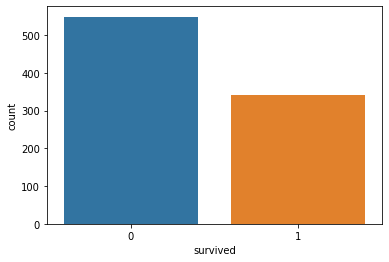

In [15]:
#Visualize Count survivors 
sns.countplot(train['survived'])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

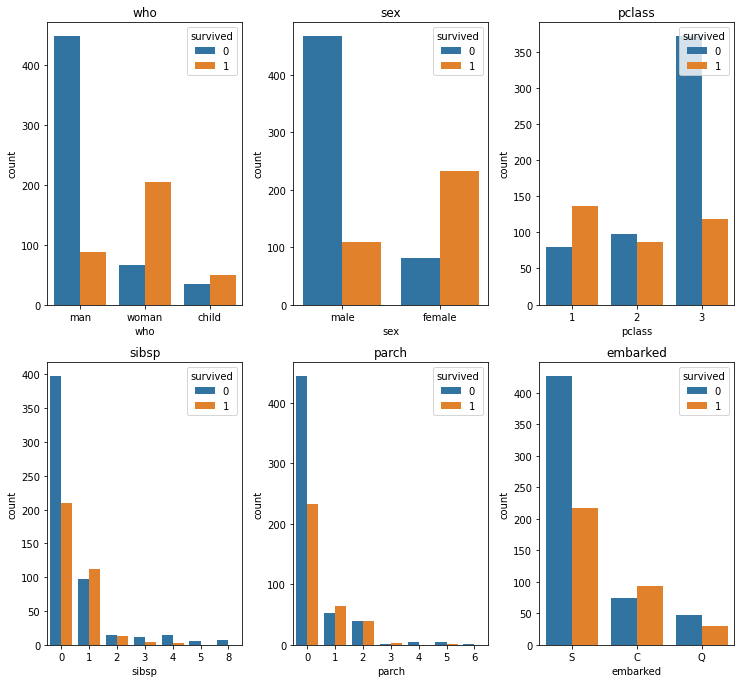

In [16]:
#visualize count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'
cols = ['who','sex','pclass','sibsp','parch','embarked']
n_rows = 2
n_cols = 3
#Subplot grid
fig ,axs = plt.subplots(n_rows,n_cols,figsize=(n_rows*5.2,n_cols*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+c
        ax = axs[r][c]
        sns.countplot(train[cols[i]],hue=train['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
plt.tight_layout()        
        

In [17]:
#Survival Rate by sex
train.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [18]:
#Survival Rate by sex and class
train.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

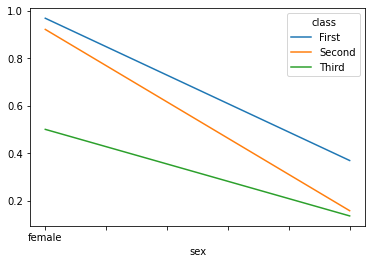

In [19]:
#Survival Rate by sex and class visually
train.pivot_table('survived',index='sex',columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

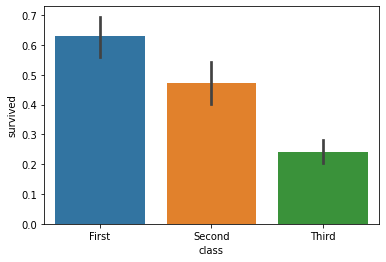

In [20]:
#Plot survival rate of each class
sns.barplot(x='class',y='survived' , data=train)

In [21]:
#Survival rate by sex , age and class
age = pd.cut(train['age'],[0,18,80])
train.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Text(0.5, 1.0, 'Fare vs Class')

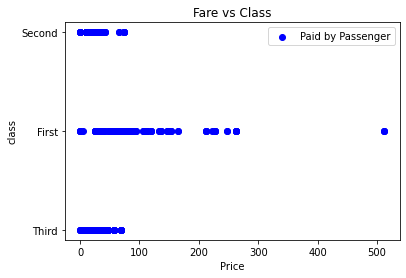

In [22]:
#Plot Prices of each class
plt.scatter(train['fare'],train['class'],color='blue',label='Paid by Passenger')
plt.xlabel('Price')
plt.ylabel('class')
plt.legend()
plt.title('Fare vs Class')

In [23]:
#Count NULL values
train.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
#Values in each column and their count
for val in train:
    print(train[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [25]:
#drop columns
train = train.drop(['who','class','embark_town','deck','alive','alone','adult_male'],axis=1)
#drop rows
train = train.dropna(subset = ['embarked','age'])

In [26]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [27]:
#Count new no of rows and columns
train.shape

(712, 8)

In [28]:
#look at data types
train.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [29]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Encode Sex column
train.iloc[:,2] = labelencoder.fit_transform(train.iloc[:,2].values)
#Encode embarked column
train.iloc[:,7] = labelencoder.fit_transform(train.iloc[:,7].values)

In [30]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [31]:
#split data in 'X' independent and 'Y' dependent variables
X = train.iloc[:,1:8].values
Y = train.iloc[:,0].values

In [32]:
#split dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
#create function with machine learning model

def models(X_train, Y_train):
    #logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski' , p=2)
    knn.fit(X_train,Y_train)
    
    #SVC(linear kernal)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0 )
    svc_lin.fit(X_train,Y_train)
    
    #SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0 )
    svc_rbf.fit(X_train,Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB( )
    gauss.fit(X_train,Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state = 0 )
    tree.fit(X_train,Y_train)
    
    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier( n_estimators=10  , criterion='entropy',random_state = 0)
    forest.fit(X_train,Y_train)
    
    #print Accuracy
    print('[0]Logistic Regression training accuracy ---->>>', log.score(X_train,Y_train))
    print('[1]KNN Regression training accuracy ---->>>', knn.score(X_train,Y_train))
    print('[2]SVC_LiN Regression training accuracy ---->>>', svc_lin.score(X_train,Y_train))
    print('[3]SVC_RBF Regression training accuracy ---->>>', svc_rbf.score(X_train,Y_train))
    print('[4]Gaussian Regression training accuracy ---->>>', gauss.score(X_train,Y_train))
    print('[5]Decision Tree Regression training accuracy ---->>>', tree.score(X_train,Y_train))
    print('[5]Random Forest Regression training accuracy ---->>>', forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [44]:
#train and get models
model = models(X_train,Y_train)

[0]Logistic Regression training accuracy ---->>> 0.7978910369068541
[1]KNN Regression training accuracy ---->>> 0.8664323374340949
[2]SVC_LiN Regression training accuracy ---->>> 0.7768014059753954
[3]SVC_RBF Regression training accuracy ---->>> 0.8506151142355008
[4]Gaussian Regression training accuracy ---->>> 0.8031634446397188
[5]Decision Tree Regression training accuracy ---->>> 0.9929701230228472
[5]Random Forest Regression training accuracy ---->>> 0.9753954305799648


In [50]:
#Show confusion matrix and accuracy for all models on test data 
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN,FP,FN,TP =  confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP+TN)/(TN+FP+FN+TP)
    print(cm)
    print('Model[{}] testing accuracy = "{}"'.format(i ,test_score ))
    print()

[[75  7]
 [19 42]]
Model[0] testing accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] testing accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] testing accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] testing accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] testing accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] testing accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] testing accuracy = "0.8391608391608392"



In [55]:
#get feature importance
forest = model[6]
importances = pd.DataFrame({'feature':train.iloc[:,1:8].columns, 'importances': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importances', ascending=False).set_index('feature')
importances

,importances
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot:xlabel='feature'>

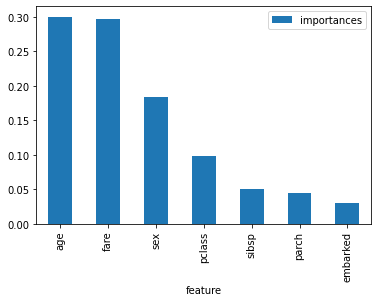

In [58]:
#visualize the importance
importances.plot.bar()

In [60]:
#print the prediction of Random forest Classifier
pred = model[6].predict(X_test)
print(pred)

print()

#print Actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [81]:
my_survival = [[1,0,21,8,6,200,0]]

In [82]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)


#print prediction using Random Forest
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred==0:
    print("Ops, Not Survived")
else:
    print("Yayy, Survived")

[0]
Ops, Not Survived
